# Finishing numerical derivatives, on to numerical integration

Today we will be discussing numerical integration, but first we need to finish numerical differentiation. 

Recall where we left off last week. We had just taken the derivative of our data everywhere, using a second-order centered-difference scheme on the interior and a forward- and backward-difference scheme on the left and right endpoints respectively.

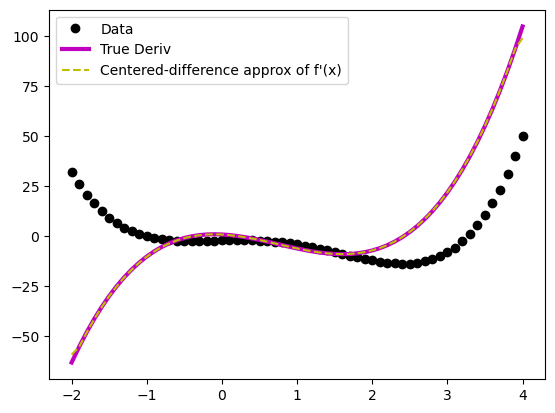

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

M = np.genfromtxt('deriv_data.csv', delimiter=',')
xdata = M[0,:]
ydata = M[1,:]

h = xdata[1] - xdata[0]

fp_centered = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
fp_centered[0] = 1/h*(ydata[1] - ydata[0]) # (f(x+h) - f(x))/h
for k in range(1, len(xdata)-1): # Now we loop starting at 1 (because backward difference doesn't work at 0), 
                               # and go up until the end-1 because backward difference doesn't work at the end.
    fp_centered[k] = 1/(2*h)*(ydata[k+1] - ydata[k-1]) # Use the centered-difference formula.
# Use the backward-difference formula at the right endpoint
fp_centered[-1] = 1/h*(ydata[-1] - ydata[-2])

plt.plot(xdata, ydata, 'ko', label='Data')
fp_true = lambda x: 4*x**3 - 9*x**2 - 2*x + 1
plt.plot(xdata, fp_true(xdata), 'm', lw=3, label='True Deriv')
plt.plot(xdata, fp_centered, '--y', label="Centered-difference approx of f'(x)")
plt.legend()

Above we observe second-order accuracy (good) everywhere except the boundaries where we have first-order accuracy (bad). To fix that, we can introduce a second-order accurate approximation to the first derivative that works on the boundaries. In this lecture we will only derive the one that works on the left boundary. You will derive the one that works on the right boundary in your homework.

At the right endpoint, we need to use only formulas that have $f(x),~f(x-h),~f(x-2h), \ldots$ etc. At the left endpoint we need to use only formulas that have $f(x),~f(x+h),~f(x+2h), \ldots$ etc. 

Luckily on the activity you already derived the series for $f(x+2h)$ so let's talk about the method that will work at the left endpoint. 

Consider the series

$
\begin{align}
 f(x) &= f(x) +&& 0f'(x) &&+ 0f''(x) &+& 0\\
  f(x+h) &= f(x) +&& h f'(x) &&+ \frac12 h^2 f''(x) &+& \frac1{3!} h^3 f'''(x) &+& \mathcal{O}(h^4)\\
   f(x+2h) &= f(x) +&& 2h f'(x) &&+ 2 h^2 f''(x) &+& \frac4{3} h^3 f'''(x) &+& \mathcal{O}(h^4).
\end{align}
$

Now take a minute to think about how you can add these together to get a second-order accurate method. You will need to eliminate the $f(x)$ terms and the $f''(x)$ terms. 

You should have found
$$f'(x) = \frac{-3f(x) + 4f(x+h) - f(x+2h)}{2h} + \mathcal{O}(h^2).$$
You can also *check* that this works by plugging in the Taylor Series for $f(x+h)$ and $f(x+2h)$ into the formula above:
$$
\frac{1}{2h} \left[ -3 f(x) + 4f(x+h) - f(x+2h) \right] =
\frac{1}{2h} \left[-3f(x) + 4 \left(f(x) + hf'(x) + \frac{h^2}{2}f''(x) + \frac1{3!} h^3f'''(x)\right) - \left(f(x) + 2h f'(x) + 2h^2 f''(x) + \frac43 h^3 f'''(x)\right) + \mathcal{O}(h^4)\right]\\
= \frac1{2h} \left[ 2h f'(x) -\frac23 h^3 f'''(x) + \mathcal{O}(h^4) \right]\\
= f'(x) + \mathcal{O}(h^2)
$$

Now we can use this at the left endpoint as follows

In [2]:
fp_centered = np.zeros(ydata.shape) # Makes fp the same shape as ydata.
fp_centered[0] = (-3*ydata[0] + 4*ydata[1] - ydata[2])/(2*h);
for k in range(1, len(xdata)-1): # Now we loop starting at 1 (because backward difference doesn't work at 0), 
                               # and go up until the end-1 because backward difference doesn't work at the end.
    fp_centered[k] = 1/(2*h)*(ydata[k+1] - ydata[k-1]) # Use the centered-difference formula.
# Use the backward-difference formula at the right endpoint
fp_centered[-1] = 1/h*(ydata[-1] - ydata[-2])

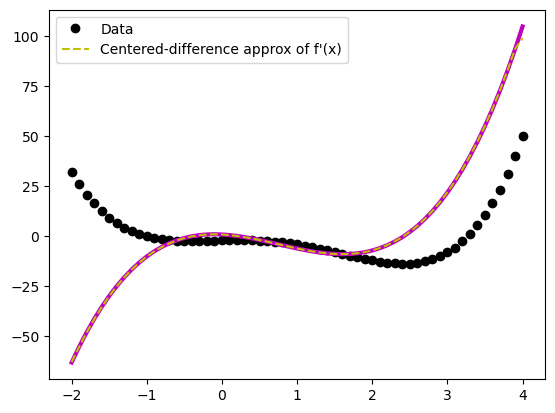

In [3]:
plt.figure(8) # Label this figure as Figure 5
plt.plot(xdata, ydata, 'ko', label='Data')
fp_true = lambda x: 4*x**3 - 9*x**2 - 2*x + 1
plt.plot(xdata, fp_true(xdata), "m", linewidth=3)

plt.plot(xdata, fp_centered, '--y', label="Centered-difference approx of f'(x)")
plt.legend()

Notice how much more accurate the approximation is at the left endpoint than the right. We won't fix the right now because I will let you derive and implement that one on your own on the homework! 

Finally, before moving on from differentiation, I want to talk about interpreting order-of-accuracy from a figure. This is a figure you will see anytime people talk about numerical methods or numerical accuracy.

First, go back to matplotlib "inline" mode to make the figures more compact. Then create a new figure and an array `error` which will hold the error for each of the $\Delta x$ values for each of the 3 methods. As a result, it will have `len(deltax_vals)` rows and `3` columns.

In [4]:
%matplotlib inline
deltax_vals = np.logspace(-1, -4, 4) 
error = np.zeros([len(deltax_vals),3])
print(error.shape)
print(deltax_vals)

(4, 3)
[0.1    0.01   0.001  0.0001]


In [5]:
# On HW: [2^(-1), 2^(-2), 2^(-3), ....]
# Notice that 2^(-3) is not the same as 2e-3. 2e-3 = 2*10^(-3)
print(2**(-3))
print(2e-3)

0.125
0.002


Now we want to loop over each of the `deltax_vals`. Before we did 
            ` for deltax in deltax_vals` but this time we also want a counter so that we can index this `error` array. python has a nice way of keeping track of both using `enumerate`. Here's an example.

In [6]:
for index, deltax in enumerate(deltax_vals):
    print(index)
    print(deltax)

0
0.1
1
0.01
2
0.001
3
0.0001


We can see that `index` keeps track of which `deltax` we are looking at. Let's use this in the loop.

In [7]:
x0 = 1
f = lambda x: np.sin(x)

true_deriv = np.cos(x0) # This shouldn't be in the for loop 
                        # because we only need to do it once.
for index, h in enumerate(deltax_vals): # Loop over the deltax_vals
    forward_diff = (f(x0 + h) - f(x0))/h
    backward_diff = (f(x0) - f(x0-h))/h
    central_diff = (f(x0+h) - f(x0-h))/(2*h)
    
    forward_err = np.abs(forward_diff - true_deriv)
    backward_err = np.abs(backward_diff - true_deriv)
    central_err = np.abs(central_diff - true_deriv)

    error[index, :] = np.array([forward_err, backward_err, central_err])
    
print(error)

[[4.29385533e-02 4.11384459e-02 9.00053698e-04]
 [4.21632486e-03 4.19831487e-03 9.00499340e-06]
 [4.20825508e-04 4.20645407e-04 9.00503947e-08]
 [4.20744495e-05 4.20726487e-05 9.00429509e-10]]


Notice that we are seeing an order of magnitude decrease every step down the first two columns and 2 orders of magnitude decrease every step down the last column. That is because we are changing $h$ by an order of magnitude as we go down the columns and forward and backward-difference are first-order accurate while central difference is second-order accurate.

We can visualize this as follows.

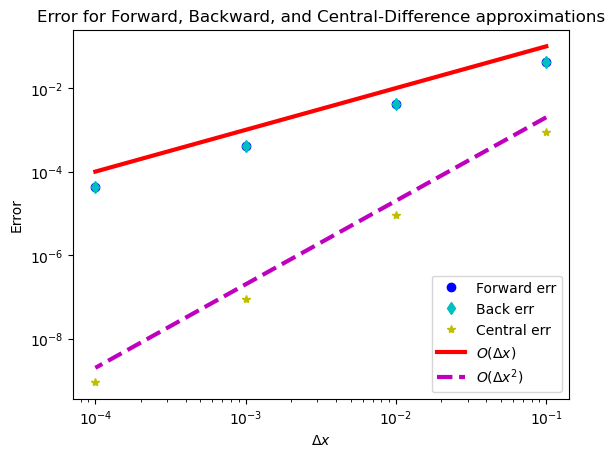

In [8]:
plt.figure(7)
plt.loglog(deltax_vals, error[:, 0], 'bo', label='Forward err')
plt.loglog(deltax_vals, error[:, 1], 'cd', label='Back err')
plt.loglog(deltax_vals, error[:, 2], 'y*', label='Central err')
plt.loglog(deltax_vals, 1*deltax_vals, 'r', linewidth=3, label=r'$O(\Delta x)$')
plt.loglog(deltax_vals, 0.2*deltax_vals**2, 'm--', linewidth=3, label=r'$O(\Delta x^2)$')
plt.xlabel(r'$\Delta x$')
plt.ylabel('Error')
plt.title('Error for Forward, Backward, and Central-Difference approximations')
plt.legend()

Here is how we interpret such a figure. First, we recognize that there are three *datasets* plotted, the error for Forward (`Forward err`), the error for Backward (`Back err`), and the error for Central (`Central err`). We can see that as $\Delta x$ increases (left to right), the error also increases for each of the methods. Visually we want to see the *rate at which they increase* because that tells us about the order of accuracy of the method. To do that, we use a `loglog` plot. A `loglog` plot plots the logarithm of the `\Delta x` values on the horizontal axis and the logarithm of the `Error` values on the vertical axis. We use a `loglog` plot when the dataset covers several *orders of magnitude* along both axes. 

The order of the method is in terms of the power on $\Delta x$ in the error term (compare $\mathcal{O}(\Delta x)$ versus $\mathcal{O}(\Delta x^2)$). Therefore, on a loglog plot what we should see is $\mathcal{O}(\log \Delta x)$ and $\mathcal{O}(\log(\Delta x^2))$. But notice that $\log(\Delta x^2) = 2\log(\Delta x)$ by the logarithm rules. Since we are plotting $\log(\Delta x)$ on the horizontal axis, if we are plotting an order-1 ($\mathcal{O}(\Delta x)$) method, we would be plotting $\log(\Delta x)$ versus $\log(\Delta x)$, where $C$ is some constant. This looks like a straight line with slope 1. If we are plotting an order-2 ($\mathcal{O}(\Delta x^2)$) method, we would be plotting $\log(\Delta x)$ versus $2 \log(\Delta x)$, which is a straight line with slope 2. Therefore, **it is the slope** of the trend line that tells us the order of accuracy in the `loglog` plot. 

You will create a similar figure on Homework 3 for integration methods. Let's get to that!

# Numerical integration

That is everything we need to cover about numerical differentiation. You will get lots of practice on that on the homework. Now let's move on to numerical integration, Calculus 2!

We will discuss several methods for numerical integration.  The general setup will be exactly the same as for differentiation.  We will either be given a function $f(x)$ and asked to compute 

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x, \hspace{1in}$ (1)

or we will be given a set of points $(x_0, y_0)$, $(x_1, y_1)$, $\dotsc$, $(x_N, y_N)$, where $y_k = f(x_k)$ for some (usually unknown) function $f(x)$ and then asked to compute

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x$.  

By convention, we will always assume that $a = x_0 < x_1 < \cdots < x_N = b$ and that the points are all evenly spaced, so $x_k - x_{k-1} = \Delta x$ is the same for all $k$.  That is, we will assume that $x_k = a + k\Delta x$ for all $0\leq k \leq N$.  The assumption that the points are in order is really no restriction at all, since we can always re-organize any data we are given.  The assumption that these points are evenly spaced is more restrictive.  In practice, it is very common to have evenly spaced data (perhaps because you are making measurements at regular times or at locations on a regular grid), but it is not strictly necessary.  It turns out that none of the methods we will discuss actually require this even spacing, but the formulas become much messier when $\Delta x$ is not constant.  It is also worth noting that there are $N + 1$ points here, not just $N$, because we start counting at $x_0$.  

As in the previous two lectures, it is easy to switch back and forth between these two settings.  If we are given a function $f(x)$, then we can simply plug in all of our $x$ values and then forget about the function.  If we are given a set of $(x_k, y_k)$ points, then we can (at least on paper) pretend that $y_k = f(x_k)$ and just never use a formula for $f(x)$.  When working on paper, it is generally much more convenient to think in terms of a function $f$, but in real world applications we often only have a set of data points, so it is important to be comfortable with both sets of notation.  

Remember that the integral in (1) can be thought of as the area under the curve $f(x)$ between $x = a$ and $x = b$.  All of our methods will be based upon the following idea: We can chop this area up into many smaller regions, then calculate the area of each smaller region and add them all up.  As long as the smaller regions approximately cover the whole area, then we will get a good approximation to the total integral.  

It turns out that integration methods are generally much more difficult to analyze than difference schemes, so we will only fully analyze the simplest methods.  You have almost certainly seen these simple methods in Calculus 2.

## Left Hand Rectangle Rule
The basic idea in our first approach is to chop the area under the curve $f(x)$ into $N$ different rectangles.  The base of the first rectangle will be the interval $[x_0, x_1]$, then the base of the second rectangle will be $[x_1, x_2]$, and so on, all the way to the $N$th rectangle, whose base will be $[x_{N-1}, x_N]$.  In general, the base of the $k$th rectangle will be the interval $[x_{k-1}, x_k]$.  Because we assumed that the $x$ values were all evenly spaced, the width of each of these intervals is just $\Delta x$.  We will determine the height by evaluating the function $f(x)$ at some point in the base.  The only real choice involved here is which point we use to determine the height.  

The first approximation method we will discuss is called the *left hand rule* or *left rectangle rule*.  In this method, we choose the height of the $k$th rectangle to be $f(x_{k-1})$.  (The name comes from the fact that $x_{k-1}$ is the leftmost point in the base of the rectangle.)

We can visualize this with the function `plot_lhr`, given below (you don't need to know how this function works, but it would not hurt to think about it!).  

In [9]:
def plot_lhr(f, a, b, dx):
    plt.figure()
    x = np.arange(a, b + dx, dx)
    y = f(x)
    n = x.size
    
    xplot = np.arange(a, b + dx/100, dx/100)
    yplot = f(xplot)
    plt.plot(xplot, yplot, 'k')
    
    for k in range(n-1):
        x_rect = [x[k], x[k], x[k + 1], x[k + 1], x[k]]
        y_rect = [0, y[k], y[k], 0, 0]
        plt.plot(x_rect, y_rect, 'b')

For example, here are the rectangles for the function $f(x) = \sin(x) + 3$ with $a = 0$, $b = 10$ and $\Delta x = 2$.  

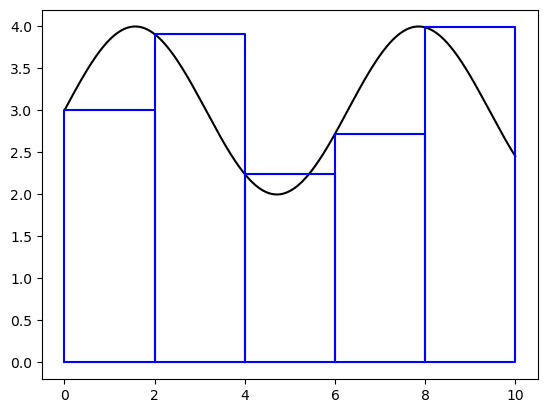

In [10]:
f = lambda x: np.sin(x) + 3
a = 0
b = 10
dx = 2
plot_lhr(f, a, b, dx)

If we plot the same function with a smaller $\Delta x$, we get


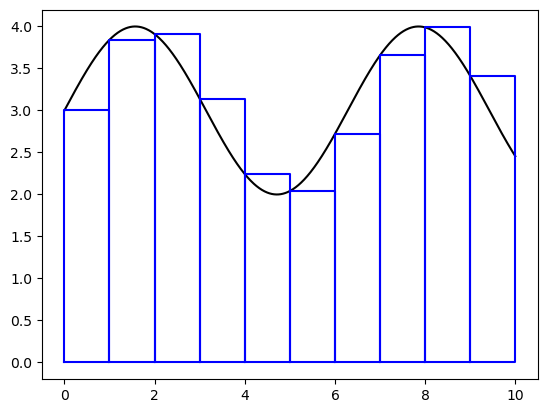

In [11]:
dx = 1
plot_lhr(f, a, b, dx)

If we shrink $\Delta x$ even further, we get

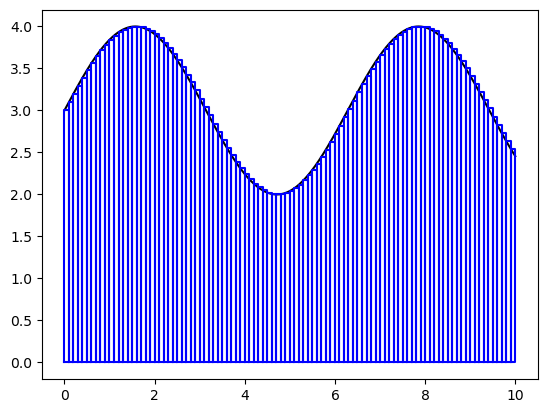

In [12]:
dx = 0.1
plot_lhr(f, a, b, dx)

The area of the $k$th rectangle is just the width times the height, or $\Delta x f(x_{k-1})$.  To find the area under the whole curve, we just add up the area of all $N$ rectangles, so we get 

$\int_{a}^{b}f(x)\,\textrm{d}x \approx \Delta x f(x_0) + \Delta x f(x_1) + \cdots + \Delta x f(x_{N-1}) = \displaystyle\sum_{k=0}^{N-1}\Delta x f(x_k) = \Delta x\displaystyle\sum_{k=0}^{N-1}f(x_k).$

### Left-hand rectangle rule error

How good an approximation is this?  More importantly, how does the quality of this approximation change as we reduce $\Delta x$?  


**The material below, about deriving the order of accuracy for this integration method will not be covered in class and you are not expected to know it. You need to know the order of accuracy of the integration methods, but not how to derive it.**

To determine how accurate this approximation is, we will first look at a simpler problem and only try to find the integral over one of the rectangles (i.e., the integral from $x_{k-1}$ to $x_k$).  The left hand rule approximation to this integral is 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x \approx \Delta x f(x_{k-1})$.

We can also approximate this integral by using a Taylor expansion of $f$.  In particular, we will expand $f(x)$ about the point $x_{k-1}$.  We get 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x = \displaystyle\int_{x_{k-1}}^{x_k}f(x_{k-1}) + (x - x_{k-1})f'(x_{k-1}) + \frac{(x - x_{k-1})^2}{2}f''(x_{k-1}) + \mathcal{O}((x - x_{k-1})^3)\,\textrm{d}x$.

This integral looks quite complicated, but we are only integrating with respect to $x$, not $x_{k-1}$, so it is really just a polynomial.  We therefore get 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x = \left[xf(x_{k-1}) + \frac{(x - x_{k-1})^2}{2}f'(x_{k-1}) + \frac{(x - x_{k-1})^3}{6}f''(x_{k-1}) + \mathcal{O}((x - x_{k-1})^4)\right]_{x = x_{k-1}}^{x_k}$.  

If we plug in the endpoints $x = x_{k-1}$ and $x = x_k$ into this antiderivative, then many of the terms become zero and we are left with 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x = (x_k - x_{k-1})f(x_{k-1}) + \frac{(x_k - x_{k-1})^2}{2}f'(x_{k-1}) + \frac{(x_{k} - x_{k-1})^3}{6}f''(x_{k-1}) + \mathcal{O}((x_k - x_{k-1})^4)$

$= \Delta xf(x_{k-1}) + \frac{(\Delta x)^2}{2}f'(x_{k-1}) + \frac{(\Delta x)^3}{6}f''(x_{k-1}) + \mathcal{O}(\Delta x^4)$.  

Since $\Delta x$ is supposed to be very small, higher powers of $\Delta x$ will be even smaller, so we can safely ignore the $\mathcal{O}(\Delta x^3)$ terms.  This means that we have 

$\displaystyle\int_{x_{k-1}}^{x_k}f(x)\,\textrm{d}x \approx \Delta x f(x_{k-1}) + \frac{(\Delta x)^2}{2}f'(x_{k-1})$.

Notice that the first term matches our approximation from the left hand rule.  This means that the left hand rule gives us a good approximation of the integral over this small interval and that the error from the left hand rule is $\frac{(\Delta x)^2}{2}f'(x_{k-1})$.  In particular, this error has a $\Delta x^2$ in it, so we say that it is second order.  We call this quantity the *local error* for the left hand rule, and we say that the left hand rule has second order local error.  

However, it is important to remember that this isn't really the problem we wanted to solve.  We just found a second order approximation to the integral of $f(x)$ from $x_{k-1}$ to $x_k$, but we wanted to approximate the integral from $a$ to $b$.  The total integral involves $N$ of these small intervals, so the total error will be roughly $N\frac{(\Delta x)^2}{2}f'(x_{k-1})$.  You might be tempted to think that $N$ is simply a constant, so we can ignore it when we use big-oh notation and just say that the total error is $\mathcal{O}(\Delta x^2)$, but this would be incorrect.  The problem is that $N$ actually depends on $\Delta x$.  If we make $\Delta x$ smaller, then we need more rectangles to cover the whole area.  In particular, we have $N = (b - a)/\Delta x$.  This means that the error for the entire integral is $\frac{(b - a)\Delta x}{2}f'(x_{k-1})$, which only has a $\Delta x^1$.  We call this quantity the *global error* of the left hand rule and we say that the left hand rule has first order global error.  

### Left-hand rectangle rule implementation 

Although we skipped the derivation above in class, it is important that you know that the left-hand rectangle rule is **first-order accurate**, meaning its error is $\mathcal{O}(\Delta x)$. 

It is very easy to implement the left hand rule in python.  As an example, let's try to find the integral of $f(x) = \sin(x) + 3$ between $a = 0$ and $b = 10$.  The antiderivative of this function is $F(x) = -\cos(x) + 3x$, and so the actual solution is 

$\displaystyle\int_{a}^{b}\sin(x) + 3\,\textrm{d}x = \left(-\cos(b) + 3b\right) - \left(-\cos(a) + 3a\right)$.  

In [13]:
print((-np.cos(b) + 3 * b) - (-np.cos(a) + 3 * a))

31.839071529076453


To set up our problem, we need to choose a list of $x$ values and calculate the corresponding $y$ values.  For example, if we choose $\Delta x = 1$ then we have 

In [14]:
dx = 1
x = np.arange(a, b + dx, dx)
y = f(x)

To calculate the left hand rule, we have to add up $(\Delta x) y_k$ for every $y$ value except the last one.  One approach (which we have used several times in this class already) is to add these terms one at a time in a loop.  For example, 

In [15]:
LHR = 0
for k in range(x.size - 1):
    LHR = LHR + dx * y[k]
print(LHR)

31.95520948210738


Another option is to collect all of the necessary $y$ values and then use the numpy function `sum` to add them all up.  Since we want to add the first through the second to last entries of $y$, we can use 

In [16]:
LHR = dx * np.sum(y[:-1])
print(LHR)

31.955209482107378


## Right Hand Rule
There was no particular reason to choose the left endpoint of each interval in the previous approximation.  We could just as easily have chosen the right endpoint (or any point in between, for that matter, but we will stick to the endpoints for now).  


To visualize this we will need another function, `plot_rhr`, similar to `plot_lhr` written above for the left-hand rectangle rule. Again, you don't need to fully understand how this works.

In [17]:
def plot_rhr(f, a, b, dx):
    x = np.arange(a, b + dx, dx)
    y = f(x)
    n = x.size
    
    xplot = np.arange(a, b + dx/100, dx/100)
    yplot = f(xplot)
    plt.plot(xplot, yplot, 'k')
    
    for k in range(n-1):
        x_rect = [x[k], x[k], x[k + 1], x[k + 1], x[k]]
        y_rect = [0, y[k + 1], y[k + 1], 0, 0]
        plt.plot(x_rect, y_rect, 'b')

Here are some illustrations of the right hand rule for different choices of $\Delta x$: 

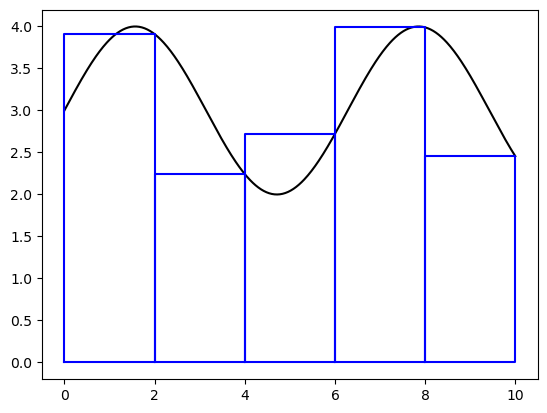

In [18]:
dx = 2
plot_rhr(f, a, b, dx)

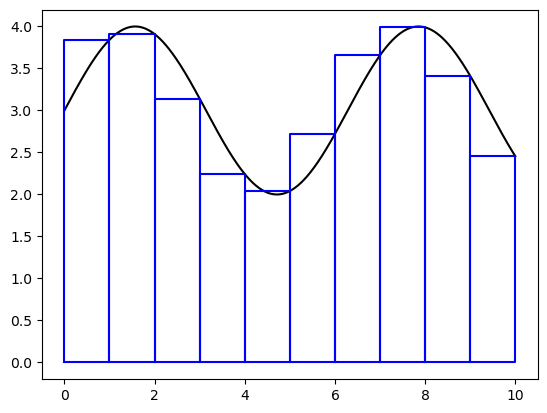

In [19]:
dx = 1
plot_rhr(f, a, b, dx)

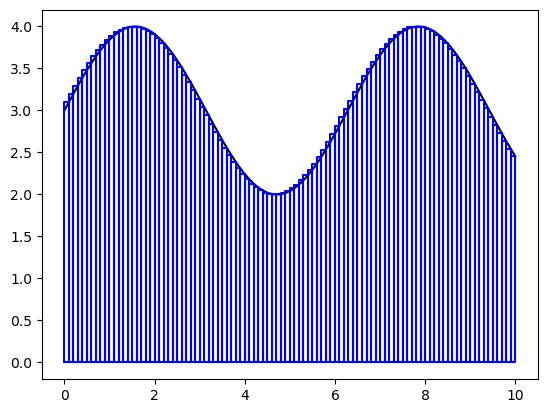

In [20]:
dx = 0.1
plot_rhr(f, a, b, dx)

The area of the $k$th rectangle is now $\Delta x f(x_k)$, and so we have the approximation 

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x \approx \Delta xf(x_1) + \Delta xf(x_2) + \cdots + \Delta xf(x_N) = \displaystyle\sum_{k=1}^{N}f(x_k)\Delta x = \Delta x\displaystyle\sum_{k=1}^{N}f(x_k)$.

We call this method the *right hand rule* or *right rectangle rule*.  Notice that the formula is almost exactly the same as for the left hand rule, but the sum starts at 1 instead of 0 and goes up to $N$ instead of $N - 1$.  That is, we use every $f(x_k)$ value except for $f(x_0)$, whereas in the left hand rule we used every value except for $f(x_N)$.  

We can calculate the error in exactly the same way as we did for the left hand rule (except that we would need to Taylor expand about $x_k$ instead of $x_{k-1}$).  If we do so, we will find that the local error is approximately $-\frac{(\Delta x)^2}{2}f'(x_k)$, and so the right hand rule has second order local error.  Likewise, we would find that the global error is approximately $-\frac{(b - a)\Delta x}{2}f'(x_k)$, and so the ***right hand rule has first order global error. *** 

Like the left hand rule, it is easy to implement this method in python.  Let's try the same integral as above: 

$\displaystyle\int_{0}^{10}\sin(x) + 3\,\textrm{d} x = \bigg[-\cos(x) + 3x\bigg]_{x=0}^{10}$.  

In [21]:
dx = 1
a = 0
b = 10
print((-np.cos(b) + 3 * b) - (-np.cos(a) + 3 * a))

31.839071529076453


To calculate the right hand rule, we have to add up $(\Delta x)y_k$ for every $y$ value except the first one.  As before, we can either do this with a loop or the built-in `sum` function.  

In [22]:
RHR = 0
for k in range(1, x.size):
    RHR = RHR + dx * y[k]
print(RHR)

31.411188371218007


In [23]:
RHR = dx * np.sum(y[1:])
print(RHR)

31.411188371218007


## Trapezoidal Rule
It is worth noting that the leading error terms for the left and right hand rules look very similar, but with opposite signs.  This suggests an improvement very similar to our approach with the central difference scheme.  We can calculate both the right and left hand approximations and then average the two.  We would then obtain the formula

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x \approx \frac{1}{2}\left[\displaystyle\sum_{k=0}^{N-1}\Delta xf(x_k) + \displaystyle\sum_{k=1}^{N}f(x_k)\Delta x\right]$.

We can actually simplify this even more by noting that most of the terms appear twice, once in each sum.  The only two exceptions are the $k = 0$ and $k = N$ terms, which only appear once.  We can therefore rewrite this approximation as 

$\displaystyle\int_{a}^{b}f(x)\,\textrm{d}x \approx \frac{\Delta x}{2}\left[f(x_0) + 2\displaystyle\sum_{k=1}^{N-1}f(x_k) + f(x_N)\right]$.

This approximation is called the *trapezoidal rule*.  The name comes from the fact that we can also derive this method by dividing the total area up into many small trapezoids instead of rectangles.  For example: 

In [24]:
def plot_trap(f, a, b, dx):
    x = np.arange(a, b + dx, dx)
    y = f(x)
    n = x.size
    
    xplot = np.arange(a, b + dx/100, dx/100)
    yplot = f(xplot)
    plt.plot(xplot, yplot, 'k')
    
    for k in range(n-1):
        x_rect = [x[k], x[k], x[k + 1], x[k + 1], x[k]]
        y_rect = [0, y[k], y[k + 1], 0, 0]
        plt.plot(x_rect, y_rect, 'b')

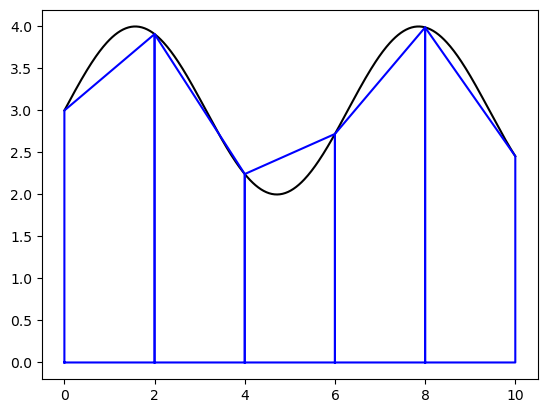

In [25]:
dx = 2
plot_trap(f, a, b, dx)

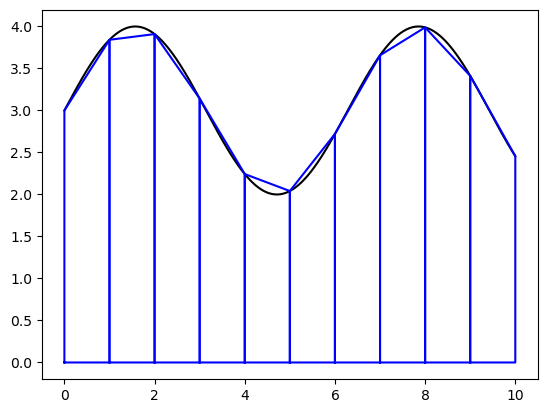

In [26]:
dx = 1
plot_trap(f, a, b, dx)

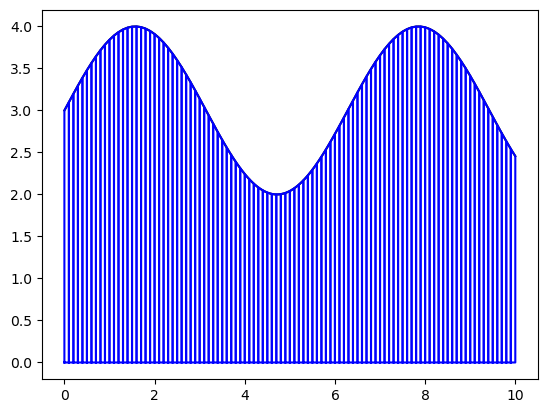

In [27]:
dx = 0.1
plot_trap(f, a, b, dx)

The analysis for this method is more complicated than before, but it turns out that the trapezoidal rule has third order local error and **second order global error.**

As an example, let's use the trapezoidal method to approximate the same integral as before: 

In [28]:
dx = 1
a = 0
b = 10
print((-np.cos(b) + 3 * b) - (-np.cos(a) + 3 * a))

31.839071529076453


We can either find the left and right hand rules first and then average them

In [29]:
LHR = dx * np.sum(y[:-1])
RHR = dx * np.sum(y[1:])
trap = (LHR + RHR) / 2
print(trap)

31.68319892666269


or we can use the formula directly:

In [30]:
trap = (dx / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
print(trap)

31.683198926662694


## The midpoint rule

The midpoint rule is another rule you may remember from calculus. Instead of using the left or right endpoints as the height of the rectangel, we can use the midpoint of the left and right endpoints. One thing to note about this is that **we cannot use the midpoint rule with data** since we **do not know the height of the function midway through the data.**

Nonetheless, let's visualize this.

In [31]:
def plot_midr(f, a, b, dx):
    x = np.arange(a, b + dx, dx)
    y = f(x)
    n = x.size
    
    xplot = np.arange(a, b + dx/100, dx/100)
    yplot = f(xplot)
    plt.plot(xplot, yplot, 'k')
    
    for k in range(n-1):
        x_rect = [x[k], x[k], x[k + 1], x[k + 1], x[k]]
        y_rect = [0, f(0.5*(x[k] + x[k+1])), f(0.5*(x[k] + x[k+1])), 0, 0]
        plt.plot(x_rect, y_rect, 'b')

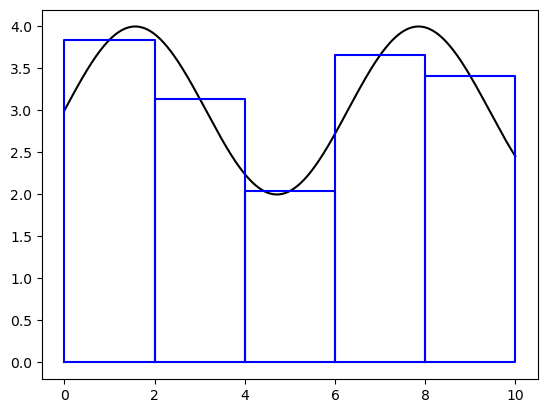

In [32]:
dx = 2
plot_midr(f, a, b, dx)

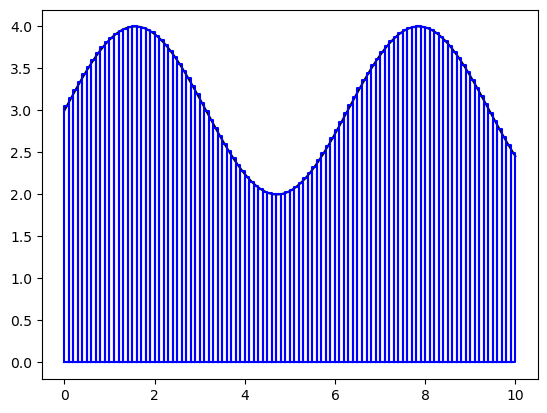

In [33]:
dx = 0.1
plot_midr(f, a, b, dx)

The midpoint rule is

$\int_{a}^{b}f(x)\,\textrm{d}x \approx \Delta x f\left(\frac{x_0 + x_1}{2}\right) + \Delta x f\left(\frac{x_1 + x_2}{2}\right) + \cdots + \Delta x f\left(\frac{x_{N-1} + x_N}{2}\right)
 = \displaystyle\sum_{k=0}^{N-1}\Delta x f  \left(\frac{x_k + x_{k+1}}{2}\right).$

 The midpoint rule also has **global error** $\mathcal{O}(\Delta x^2).$


## Simpson's rule

The last numerical integration method we will discuss is Simpson's rule. Simpson's rule is a little bit fancier. The other integration methods can be thought of as interpolating the function we are integrating over each interval. First we use an interpolation of degree 0 (a flat line), then we use an interpolation of degree 1 (a line with some slope) (trapezoidal rule). The next reasonable thing would be to interpolate with a quadratic function. That's exactly what Simpson's rule does. 

In [34]:
def plot_simpsons(f, a, b, dx):
    x = np.arange(a, b + dx, dx)
    y = f(x)
    n = x.size
    
    xplot = np.arange(a, b + dx/100, dx/100)
    yplot = f(xplot)
    plt.plot(xplot, yplot, 'k')
    
    for k in range(0,n-1,2):
        x_interp = x[k:k+3]
        y_interp = y[k:k+3]
        quad_interp = np.polyfit(x_interp, y_interp, 2)
        xinterp_plot = np.linspace(x_interp[0], x_interp[-1])
        plt.plot(xinterp_plot, np.polyval(quad_interp, xinterp_plot), 'b')

/var/folders/ng/hs3dclln4lv73c8vrw4wy0m40000gn/T/ipykernel_4596/562665492.py:2: RankWarning: Polyfit may be poorly conditioned
  plot_simpsons(f, a, b, dx)


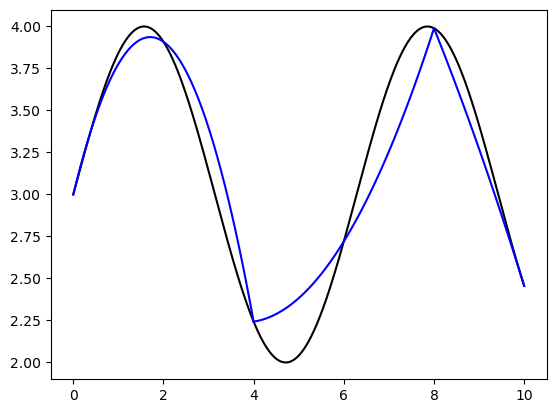

In [35]:
dx = 2
plot_simpsons(f, a, b, dx)

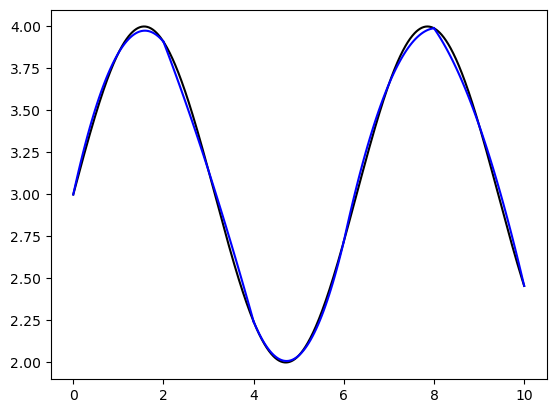

In [36]:
dx = 1
plot_simpsons(f, a, b, dx)

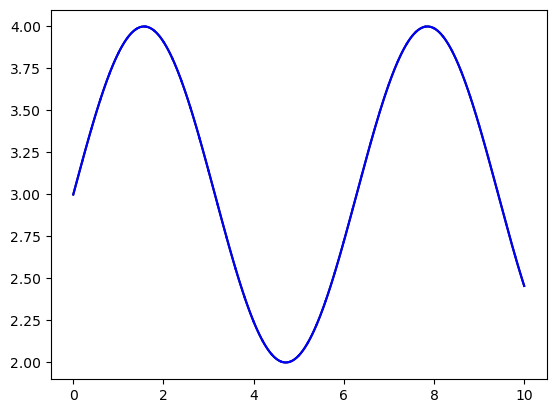

In [37]:
dx = 0.1
plot_simpsons(f, a, b, dx)

There are a few important things to know about Simpson's rule
- We need to have an even number of subintervals of our domain. This is because three points are needed to uniquely define a quadratic function. See handwritten notes for how this works.
- Simpson's rule has global error $\mathcal{O}(\Delta x^4)$! That is really accurate.

Here is the formula

$$
\int_a^b f(x)~\mathrm{d}x = \frac{\Delta x}{3} \left[f(x_0) + f(x_N) + 4 \sum_{k=1, \text{odds}}^{N-1} f(x_k) + 2 \sum_{k=2, \text{evens}}^{N-2} f(x_k) \right]
$$

so we have a sum over the odd indices and a sum over the even indices separately. 

Here is an example for how we can do that, using the built-in sum function.

In [38]:
dx = 1
simpson = (dx / 3)*(y[0] + 4*sum(y[1:-1:2]) + 2*sum(y[2:-2:2]) + y[-1])
print(simpson)

31.850647152551907


## Builtin Functions
Python has several useful builtin functions for approximating integrals.  First, there is the `trapz` function from the numpy package, which implements the trapezoidal rule.  The easiest way to use this command is to give it a vector of $y$ values and a vector of $x$ values corresponding to the $(x_k, y_k)$ points from our data set.  For example, if we were solving the same problem as above, then we could just write 

In [39]:
trap = np.trapz(y, x)
print(trap)

31.683198926662694


It is important to keep in mind that `y` and `x` are arrays, not functions.  Python figures out the spacing $\Delta x$ by looking at the array `x`.  

Another important built-in function called `quad` can be found in the `integrate` sub-package of `scipy`.  The general syntax looks like this: 

`Int, err = scipy.integrate.quad(f, a, b)`

where `f` is the function (not an array) you want to integrate and `a` and `b` are the bounds of integration.  The first return value is the integral and the second is an estimate of the error between this approximation and the true value.  

The `quad` function uses substantially more sophisticated algorithms than we have covered here.  It is worth noting that this function does not use the same method as the MATLAB function `quad`.  Instead, `scipy.integrate.quad` is the equivalent of the MATLAB function `integral`.  

In [40]:
import scipy.integrate

Int, err = scipy.integrate.quad(f, a, b)
print(Int)

31.839071529076453
